### Names: Jared Miner and Jimmy Pronchick
### Instructor: Brian King
### Semester: CSCI 349 - Spring 2023

In [176]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score,homogeneity_completeness_v_measure, pairwise_distances

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.decomposition import PCA

**Introduction**

In our project, we will be examining trends in common Major League Baseball statistics across time using the dataset found at https://www.kaggle.com/datasets/joyshil0599/mlb-hitting-and-pitching-stats-through-the-years?resource=download. This dataset covers seasons from the late 1800s through 2022. In particular, we will be examining how recent trends in important measurements such as batting average, OBP, SLG, OPS, ERA, and WHIP may be affected by the new rule changes implemented this year in MLB, such as the addition of a pitch clock, wider bases, and a ban on shifts, which were all designed to speed up the game, and increase hits and stolen bases. 

**Data**

In [109]:
df_hitting = pd.read_csv("../data/baseball_hitting.csv")

In [110]:
df_pitching = pd.read_csv("../data/baseball_pitcher.csv")

In [111]:
df_hitting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player name            2500 non-null   object 
 1   position               2500 non-null   object 
 2   Games                  2500 non-null   float64
 3   At-bat                 2500 non-null   float64
 4   Runs                   2500 non-null   float64
 5   Hits                   2500 non-null   float64
 6   Double (2B)            2500 non-null   float64
 7   third baseman          2500 non-null   float64
 8   home run               2500 non-null   float64
 9   run batted in          2500 non-null   float64
 10  a walk                 2500 non-null   float64
 11  Strikeouts             2500 non-null   object 
 12  stolen base            2500 non-null   float64
 13  Caught stealing        2500 non-null   object 
 14  AVG                    2500 non-null   float64
 15  On-b

In [112]:
df_pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player name         2575 non-null   object 
 1   Position            2575 non-null   object 
 2   Win                 2575 non-null   float64
 3   Loss                2575 non-null   float64
 4   Earned run Average  2575 non-null   float64
 5   Games played        2575 non-null   float64
 6   Games Started       2575 non-null   float64
 7   Complete Game       2575 non-null   float64
 8   Shutout             2575 non-null   float64
 9   Save                2575 non-null   float64
 10  Save Opportunity    2575 non-null   object 
 11  Innings pitched     2575 non-null   float64
 12  hit                 2575 non-null   float64
 13  run                 2575 non-null   float64
 14  earned run          2575 non-null   float64
 15  home run            2575 non-null   float64
 16   Hit B

In [113]:
df_hitting.head()

Player name position   Games   At-bat    Runs    Hits  Double (2B)  \
0      B Bonds       LF  2986.0   9847.0  2227.0  2935.0        601.0   
1      H Aaron       RF  3298.0  12364.0  2174.0  3771.0        624.0   
2       B Ruth       RF  2504.0   8399.0  2174.0  2873.0        506.0   
3     A Pujols       1B  3080.0  11421.0  1914.0  3384.0        686.0   
4  A Rodriguez       SS  2784.0  10566.0  2021.0  3115.0        548.0   

   third baseman  home run  run batted in  a walk Strikeouts  stolen base   \
0           77.0     762.0         1996.0  2558.0       1539         514.0   
1           98.0     755.0         2297.0  1402.0       1383         240.0   
2          136.0     714.0         2213.0  2062.0       1330         123.0   
3           16.0     703.0         2218.0  1373.0       1404         117.0   
4           31.0     696.0         2086.0  1338.0       2287         329.0   

  Caught stealing    AVG  On-base Percentage  Slugging Percentage  \
0             141  0.298               0.444                0.607   
1              73  0.305               0.374                0.555   
2             117  0.342               0.474                0.690   
3              43  0.296               0.374                0.544   
4              76  0.295               0.380                0.550   

   On-base Plus Slugging  
0                  1.051  
1                  0.929  
2                  1.164  
3                  0.918  
4                  0.930

In [114]:
df_pitching.head()

Player name Position    Win   Loss  Earned run Average  Games played  \
0      N Ryan        P  324.0  292.0                3.19         807.0   
1   R Johnson        P  303.0  166.0                3.29         618.0   
2   R Clemens        P  354.0  184.0                3.12         709.0   
3   S Carlton        P  329.0  244.0                3.22         741.0   
4  B Blyleven        P  287.0  250.0                3.31         692.0   

   Games Started  Complete Game  Shutout  Save  ... Innings pitched     hit  \
0          773.0          222.0     61.0   3.0  ...          5386.0  3923.0   
1          603.0          100.0     37.0   2.0  ...          4135.1  3346.0   
2          707.0          118.0     46.0   0.0  ...          4916.2  4185.0   
3          709.0          254.0     55.0   2.0  ...          5217.1  4672.0   
4          685.0          242.0     60.0   0.0  ...          4970.0  4632.0   

      run  earned run  home run   Hit Batsmen  base on balls  Strikeouts  \
0  2178.0      1911.0     321.0         158.0         2795.0      5714.0   
1  1703.0      1513.0     411.0         190.0         1497.0      4875.0   
2  1885.0      1707.0     363.0         159.0         1580.0      4672.0   
3  2130.0      1864.0     414.0          53.0         1833.0      4136.0   
4  2029.0      1830.0     430.0         155.0         1322.0      3701.0   

   WHIP    AVG  
0  1.25  0.204  
1  1.17  0.221  
2  1.17  0.229  
3  1.25   0.24  
4  1.20  0.248  

[5 rows x 21 columns]

**Data Preparation**

**Data Preparation**

These are the steps we've decided are important to complete as a part of data preparation / cleaning:

- Downcasting columns with float type
- Converting columns with object type to float
- Replacing – entries (missing data) with nan values
- Converting column names to more common / friendly names (such as strikeouts -> K)
- Setting the index as the player name
- Removing duplicate entries
- Moving columns to the desired order (to make analysis / selection easier)

In [115]:
# Downcast float cols

float_cols_hitting = df_hitting.select_dtypes('float').columns

df_hitting[float_cols_hitting] = df_hitting[float_cols_hitting].apply(pd.to_numeric, downcast = "float")


In [116]:
# Downcast float cols
float_cols_pitching = df_pitching.select_dtypes('float').columns
df_pitching[float_cols_pitching] = df_pitching[float_cols_pitching].apply(pd.to_numeric, downcast = "float")

In [117]:
# Convert cells with -- entries to nan values

df_hitting = df_hitting.replace("--", None)
df_pitching = df_pitching.replace("--", None)

In [118]:
# count nan values
nan_count_hitting = df_hitting.isna().sum()
nan_count_pitching = df_pitching.isna().sum()

In [119]:
nan_count_hitting

Player name                8
position                   8
Games                      8
At-bat                     8
Runs                       8
Hits                       8
Double (2B)                8
third baseman              8
home run                   8
run batted in              8
a walk                     8
Strikeouts                20
stolen base                8
Caught stealing          200
AVG                        8
On-base Percentage         8
Slugging Percentage        8
On-base Plus Slugging     20
dtype: int64

In [120]:
nan_count_pitching

Player name             2
Position                2
Win                     2
Loss                    2
Earned run Average      2
Games played            2
Games Started           2
Complete Game           2
Shutout                 2
Save                    2
Save Opportunity      831
Innings pitched         2
hit                     2
run                     2
earned run              2
home run                2
 Hit Batsmen            2
base on balls          12
Strikeouts              2
WHIP                    2
AVG                    12
dtype: int64

In [121]:
# count num of missing rows

num_missing_rows_hitting = len(df_hitting) - len(df_hitting.dropna())

In [122]:
num_missing_rows_pitching = len(df_pitching) - len(df_pitching.dropna())

In [123]:
# Drop rows with any nan values

df_hitting = df_hitting.dropna()

In [124]:
df_pitching = df_pitching.dropna()

In [125]:
# Convert obj cols to float type


# Convert obj cols to float type
df_hitting['Strikeouts']= df_hitting['Strikeouts'].astype(float)
df_hitting['Caught stealing'] = df_hitting['Caught stealing'].astype(float)

df_pitching['Save Opportunity'] = df_pitching['Save Opportunity'].astype(float)
df_pitching['AVG'] = df_pitching['AVG'].astype(float)

In [126]:
# Rename columns to make them easier to reference
df_hitting.columns


Index(['Player name', 'position', 'Games', 'At-bat', 'Runs', 'Hits',
       'Double (2B)', 'third baseman', 'home run', 'run batted in', 'a walk',
       'Strikeouts', 'stolen base ', 'Caught stealing', 'AVG',
       'On-base Percentage', 'Slugging Percentage', 'On-base Plus Slugging'],
      dtype='object')

In [127]:
# Rename columns to make them easier to reference
df_hitting["NAME"] = df_hitting["Player name"]
df_hitting["POS"] = df_hitting["position"]
df_hitting["GP"] = df_hitting["Games"]
df_hitting["AB"] = df_hitting["At-bat"]
df_hitting["R"] = df_hitting["Runs"]
df_hitting["H"] = df_hitting["Hits"]
df_hitting["2B"] = df_hitting["Double (2B)"]
df_hitting["3B"] = df_hitting["third baseman"]
df_hitting["HR"] = df_hitting["home run"]
df_hitting["RBI"] = df_hitting["run batted in"]
df_hitting["BB"] = df_hitting["a walk"]
df_hitting["K"] = df_hitting["Strikeouts"]
df_hitting["SB"] = df_hitting["stolen base "]
df_hitting["CS"] = df_hitting["Caught stealing"]
df_hitting["OBP"] = df_hitting["On-base Percentage"]
df_hitting["SLG"] = df_hitting["Slugging Percentage"]
df_hitting["OPS"] = df_hitting['On-base Plus Slugging']

df_hitting = df_hitting.drop(columns = ['Player name', 'position', 'Games', 'At-bat', 'Runs', 'Hits',
       'Double (2B)', 'third baseman', 'home run', 'run batted in', 'a walk',
       'Strikeouts', 'stolen base ', 'Caught stealing',
       'On-base Percentage', 'Slugging Percentage', 'On-base Plus Slugging'])


In [128]:
# Set index as player name

#df_hitting = df_hitting.set_index(df_hitting.loc[:,"Name"])
df_hitting = df_hitting.set_index("NAME")

In [129]:
# move columns to desired order

pos_column = df_hitting.pop("POS")
df_hitting.insert(0, "POS", pos_column)

avg_column = df_hitting.pop("AVG")
df_hitting.insert(13, "AVG", avg_column)

In [130]:
# Rename columns to make them easier to reference
df_pitching.columns

Index(['Player name', 'Position', 'Win', 'Loss', 'Earned run Average',
       'Games played', 'Games Started', 'Complete Game', 'Shutout', 'Save',
       'Save Opportunity', 'Innings pitched', 'hit', 'run', 'earned run',
       'home run', ' Hit Batsmen', 'base on balls', 'Strikeouts', 'WHIP',
       'AVG'],
      dtype='object')

In [131]:
# Rename columns to make them easier to reference
df_pitching["NAME"] = df_pitching["Player name"]
df_pitching["POS"] = df_pitching["Position"]
df_pitching["GP"] = df_pitching["Games played"]
df_pitching["W"] = df_pitching["Win"]
df_pitching["L"] = df_pitching["Loss"]
df_pitching["ERA"] = df_pitching["Earned run Average"]
df_pitching["GS"] = df_pitching["Games Started"]
df_pitching["CG"] = df_pitching["Complete Game"]
df_pitching["STO"] = df_pitching["Shutout"]
df_pitching["SV"] = df_pitching["Save"]
df_pitching["SVO"] = df_pitching["Save Opportunity"]
df_pitching["IP"] = df_pitching["Innings pitched"]
df_pitching["H"] = df_pitching["hit"]
df_pitching["R"] = df_pitching["run"]
df_pitching["ER"] = df_pitching["earned run"]
df_pitching["HR"] = df_pitching["home run"]
df_pitching["HBP"] = df_pitching[" Hit Batsmen"]
df_pitching["BB"] = df_pitching['base on balls']
df_pitching["K"] = df_pitching['Strikeouts']

df_pitching = df_pitching.drop(columns = ['Player name', 'Position', 'Win', 'Loss', 'Earned run Average',
       'Games played', 'Games Started', 'Complete Game', 'Shutout', 'Save',
       'Save Opportunity', 'Innings pitched', 'hit', 'run', 'earned run',
       'home run', ' Hit Batsmen', 'base on balls', 'Strikeouts'])


In [132]:
# Set index as player name

#df_pitching = df_pitching.set_index(df_pitching.loc[:,"Name"])
df_pitching = df_pitching.set_index("NAME")

In [133]:
# move columns to desired order

pos_column = df_pitching.pop("POS")
df_pitching.insert(0, "POS", pos_column)

avg_column = df_pitching.pop("AVG")
df_pitching.insert(13, "AVG", avg_column)

whip_column = df_pitching.pop("WHIP")
df_pitching.insert(14, "WHIP", whip_column)

In [134]:
df_hitting

POS      GP       AB       R       H     2B     3B     HR     RBI  \
NAME                                                                            
B Bonds      LF  2986.0   9847.0  2227.0  2935.0  601.0   77.0  762.0  1996.0   
H Aaron      RF  3298.0  12364.0  2174.0  3771.0  624.0   98.0  755.0  2297.0   
B Ruth       RF  2504.0   8399.0  2174.0  2873.0  506.0  136.0  714.0  2213.0   
A Pujols     1B  3080.0  11421.0  1914.0  3384.0  686.0   16.0  703.0  2218.0   
A Rodriguez  SS  2784.0  10566.0  2021.0  3115.0  548.0   31.0  696.0  2086.0   
...          ..     ...      ...     ...     ...    ...    ...    ...     ...   
J Bowker     1B   240.0    574.0    54.0   133.0   25.0    5.0   17.0    73.0   
K Garlick    LF   144.0    319.0    48.0    73.0   16.0    0.0   17.0    37.0   
J Bucher     3B   554.0   1792.0   242.0   474.0   66.0   19.0   17.0   193.0   
R Derry      LF   187.0    553.0    68.0   124.0   17.0    7.0   17.0    73.0   
L Niekro     1B   195.0    499.0    61.0   123.0   26.0    5.0   17.0    79.0   

                 BB       K     SB     CS    AVG    OBP    SLG    OPS  
NAME                                                                   
B Bonds      2558.0  1539.0  514.0  141.0  0.298  0.444  0.607  1.051  
H Aaron      1402.0  1383.0  240.0   73.0  0.305  0.374  0.555  0.929  
B Ruth       2062.0  1330.0  123.0  117.0  0.342  0.474  0.690  1.164  
A Pujols     1373.0  1404.0  117.0   43.0  0.296  0.374  0.544  0.918  
A Rodriguez  1338.0  2287.0  329.0   76.0  0.295  0.380  0.550  0.930  
...             ...     ...    ...    ...    ...    ...    ...    ...  
J Bowker       39.0   136.0    2.0    3.0  0.232  0.283  0.382  0.665  
K Garlick      19.0   106.0    1.0    0.0  0.229  0.281  0.439  0.720  
J Bucher       91.0   113.0   19.0    6.0  0.265  0.302  0.351  0.653  
R Derry        78.0   124.0    2.0    0.0  0.224  0.322  0.373  0.695  
L Niekro       29.0    91.0    0.0    2.0  0.246  0.288  0.421  0.709  

[2296 rows x 17 columns]

In [135]:
df_hitting.index.unique()

Index(['B Bonds', 'H Aaron', 'B Ruth', 'A Pujols', 'A Rodriguez', 'W Mays',
       'K Griffey', 'J Thome', 'S Sosa', 'F Robinson',
       ...
       'S Livingstone', 'E Burton', 'E Wynn', 'C Donnels', 'R Theriot',
       'J Bowker', 'K Garlick', 'J Bucher', 'R Derry', 'L Niekro'],
      dtype='object', name='NAME', length=2184)

In [136]:
df_hitting.index

Index(['B Bonds', 'H Aaron', 'B Ruth', 'A Pujols', 'A Rodriguez', 'W Mays',
       'K Griffey', 'J Thome', 'S Sosa', 'F Robinson',
       ...
       'C Dickerson', 'E Wynn', 'J Smith', 'C Donnels', 'R Theriot',
       'J Bowker', 'K Garlick', 'J Bucher', 'R Derry', 'L Niekro'],
      dtype='object', name='NAME', length=2296)

In [137]:
df_hitting.index.drop_duplicates()

Index(['B Bonds', 'H Aaron', 'B Ruth', 'A Pujols', 'A Rodriguez', 'W Mays',
       'K Griffey', 'J Thome', 'S Sosa', 'F Robinson',
       ...
       'S Livingstone', 'E Burton', 'E Wynn', 'C Donnels', 'R Theriot',
       'J Bowker', 'K Garlick', 'J Bucher', 'R Derry', 'L Niekro'],
      dtype='object', name='NAME', length=2184)

In [138]:
df_pitching.index.unique()

Index(['N Ryan', 'R Johnson', 'R Clemens', 'S Carlton', 'B Blyleven',
       'T Seaver', 'D Sutton', 'G Perry', 'G Maddux', 'P Niekro',
       ...
       'J Roa', 'E Butler', 'D Eiland', 'E Goeddel', 'B Munoz', 'J Machi',
       'B Martin', 'E Bell', 'D Ponce de Leon', 'R Hinton'],
      dtype='object', name='NAME', length=1698)

In [139]:
df_pitching.index

Index(['N Ryan', 'R Johnson', 'R Clemens', 'S Carlton', 'B Blyleven',
       'T Seaver', 'D Sutton', 'G Perry', 'G Maddux', 'P Niekro',
       ...
       'J Santiago', 'E Butler', 'D Eiland', 'E Goeddel', 'B Munoz', 'J Machi',
       'B Martin', 'E Bell', 'D Ponce de Leon', 'R Hinton'],
      dtype='object', name='NAME', length=1746)

In [140]:
df_pitching.index.drop_duplicates()

Index(['N Ryan', 'R Johnson', 'R Clemens', 'S Carlton', 'B Blyleven',
       'T Seaver', 'D Sutton', 'G Perry', 'G Maddux', 'P Niekro',
       ...
       'J Roa', 'E Butler', 'D Eiland', 'E Goeddel', 'B Munoz', 'J Machi',
       'B Martin', 'E Bell', 'D Ponce de Leon', 'R Hinton'],
      dtype='object', name='NAME', length=1698)

## Modeling

For the modeling part of the project, we think that it will be most helpful to use clustering techniques to try to group similar players together, which may more easily show trends in the data. Some basic machine learning methods, such as k-means classification, may also be helpful.

Our overarching aim of the project, besides just finding interesting trends in a large baseball dataset, is to try to find useful trends to be able to predict how rule changes will affect future MLB seasons.

### K-means clustering

Our first analysis method will be to use a k-means clustering technique.

In [141]:
def run_kmeans(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto").fit(df)
    labels = kmeans.predict(df)
    cluster = kmeans.transform(df)
    return labels

#### Pitching

In [142]:
df_bullpen = pd.concat([df_pitching.GP,df_pitching.IP], axis=1)

C:\Users\jkm03\anaconda3\envs\csci349\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\jkm03\anaconda3\envs\csci349\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\jkm03\anaconda3\envs\csci349\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\jkm03\anaconda3\envs\csci349\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarn

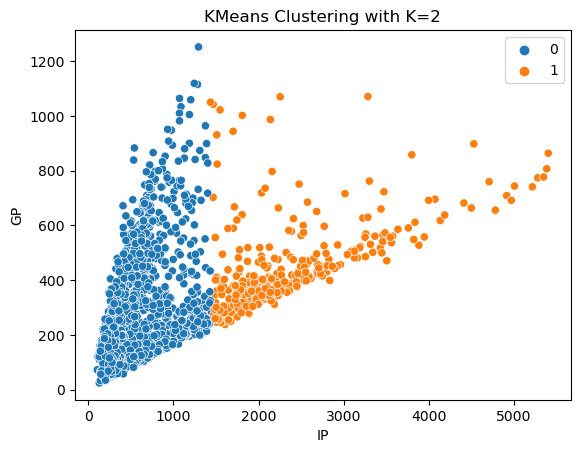

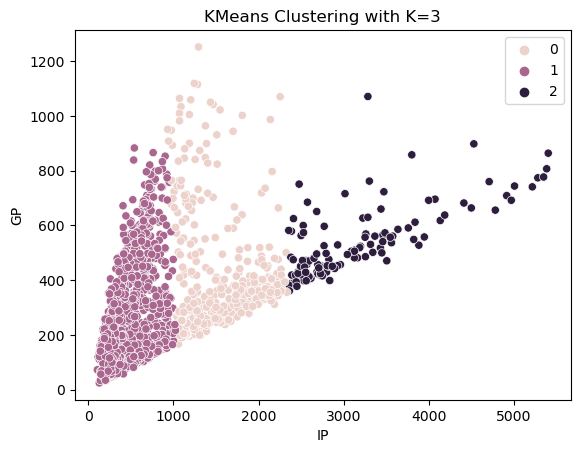

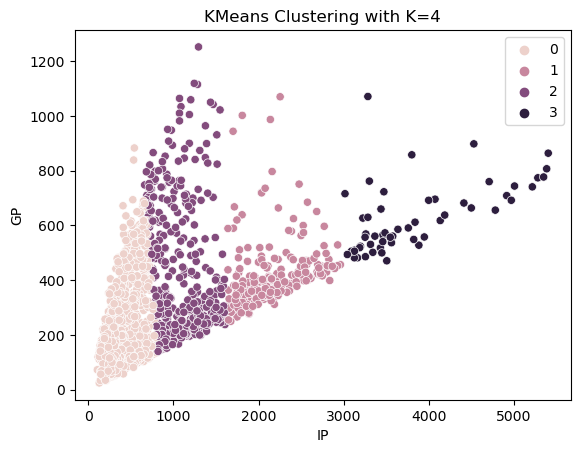

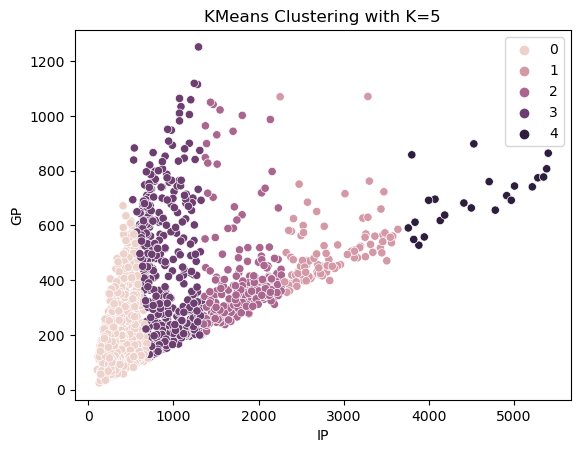

In [143]:
# run model with k = 2, 3, 4, 5

# clustering IP by GP

for i in range(2,6,1):
    labels=run_kmeans(df_bullpen,i)
    plt.figure()
    sns.scatterplot(x=df_bullpen.IP,y=df_bullpen.GP, hue=labels)
    plt.title("KMeans Clustering with K={}".format(i))

In [144]:
#### Hitting

In [145]:
# select only numeric cols (not position)

df_hitting_numeric = df_hitting.iloc[:, 1:]

In [146]:
df_hitting_numeric

GP       AB       R       H     2B     3B     HR     RBI  \
NAME                                                                        
B Bonds      2986.0   9847.0  2227.0  2935.0  601.0   77.0  762.0  1996.0   
H Aaron      3298.0  12364.0  2174.0  3771.0  624.0   98.0  755.0  2297.0   
B Ruth       2504.0   8399.0  2174.0  2873.0  506.0  136.0  714.0  2213.0   
A Pujols     3080.0  11421.0  1914.0  3384.0  686.0   16.0  703.0  2218.0   
A Rodriguez  2784.0  10566.0  2021.0  3115.0  548.0   31.0  696.0  2086.0   
...             ...      ...     ...     ...    ...    ...    ...     ...   
J Bowker      240.0    574.0    54.0   133.0   25.0    5.0   17.0    73.0   
K Garlick     144.0    319.0    48.0    73.0   16.0    0.0   17.0    37.0   
J Bucher      554.0   1792.0   242.0   474.0   66.0   19.0   17.0   193.0   
R Derry       187.0    553.0    68.0   124.0   17.0    7.0   17.0    73.0   
L Niekro      195.0    499.0    61.0   123.0   26.0    5.0   17.0    79.0   

                 BB       K     SB     CS    AVG    OBP    SLG    OPS  
NAME                                                                   
B Bonds      2558.0  1539.0  514.0  141.0  0.298  0.444  0.607  1.051  
H Aaron      1402.0  1383.0  240.0   73.0  0.305  0.374  0.555  0.929  
B Ruth       2062.0  1330.0  123.0  117.0  0.342  0.474  0.690  1.164  
A Pujols     1373.0  1404.0  117.0   43.0  0.296  0.374  0.544  0.918  
A Rodriguez  1338.0  2287.0  329.0   76.0  0.295  0.380  0.550  0.930  
...             ...     ...    ...    ...    ...    ...    ...    ...  
J Bowker       39.0   136.0    2.0    3.0  0.232  0.283  0.382  0.665  
K Garlick      19.0   106.0    1.0    0.0  0.229  0.281  0.439  0.720  
J Bucher       91.0   113.0   19.0    6.0  0.265  0.302  0.351  0.653  
R Derry        78.0   124.0    2.0    0.0  0.224  0.322  0.373  0.695  
L Niekro       29.0    91.0    0.0    2.0  0.246  0.288  0.421  0.709  

[2296 rows x 16 columns]

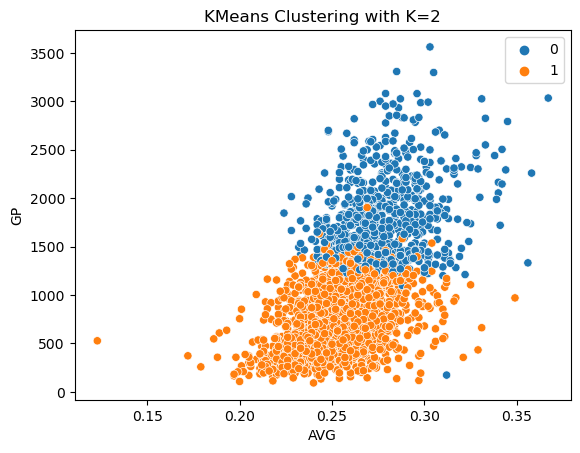

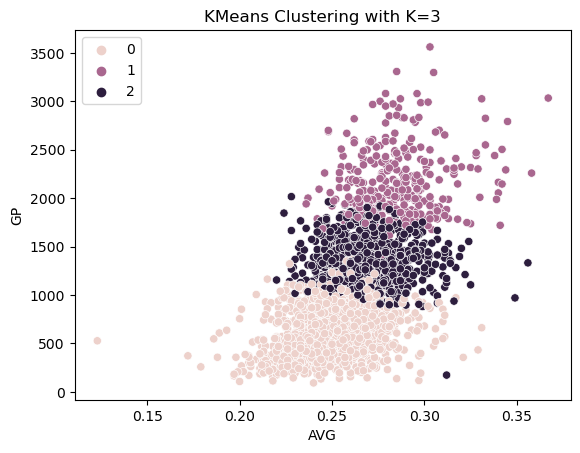

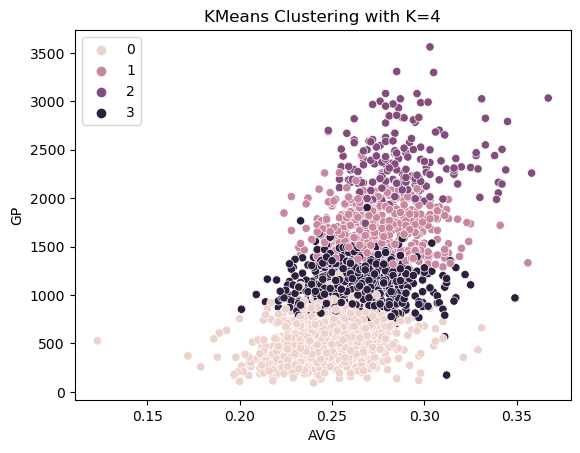

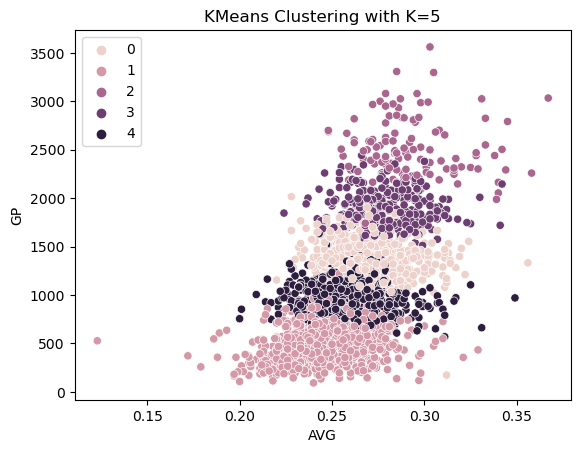

In [147]:
# run model with k = 2, 3, 4, 5

# clustering AVG by GP

for i in range(2,6,1):
    labels=run_kmeans(df_hitting_numeric,i)
    plt.figure()
    sns.scatterplot(x=df_hitting_numeric.AVG,y=df_hitting_numeric.GP, hue=labels)
    plt.title("KMeans Clustering with K={}".format(i))

These k-means analyses show that several mostly distinct groups of players are created, especially for larger values of k.  

In [148]:
### Clustermaps on subsets of the data

Next, we are going to look at clustermaps for several different selected subsets of the data, specifically looking at how players compare in a few selected variables.

#### Pitching

#### Hitting

The first subset of players will be ones with very long careers (over 10,000 at bats, or approximately 20 seasons played).

In [149]:
# select only hitters with longest careers

gp_filter = df_hitting["AB"] > 10000

df_hitting_long_careers = df_hitting.where(gp_filter)

In [150]:
# Remove nan rows 

df_hitting_long_careers = df_hitting_long_careers.dropna()

In [151]:
len(df_hitting_long_careers)

26

In [152]:
# select only numeric cols (not position)

df_hitting_long_careers_numeric = df_hitting_long_careers.iloc[:, 1:]

In [153]:
df_hitting_long_careers_numeric = df_hitting_long_careers_numeric.dropna()

Text(0.5, 0.98, 'Plate Discipline')

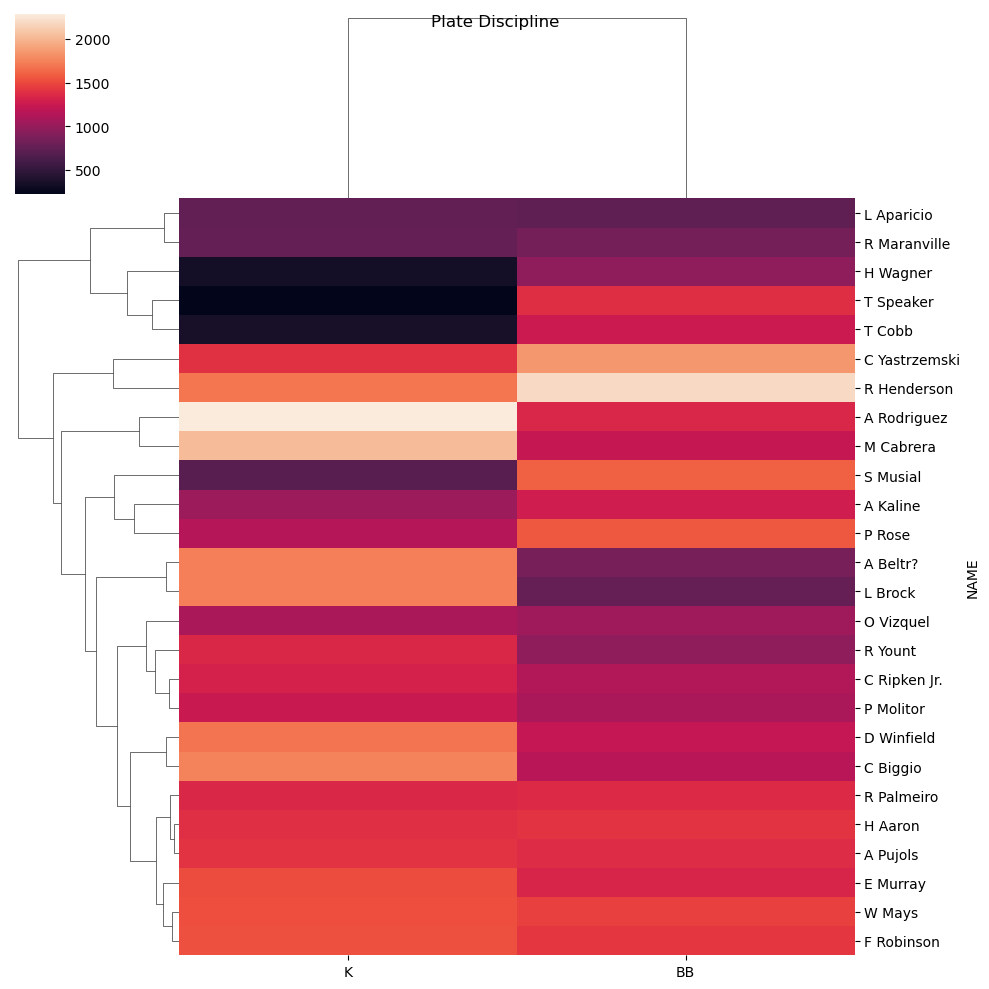

In [154]:
# clustermap of strikeouts vs walks

sns.clustermap(df_hitting_long_careers.loc[:, ["K", "BB"]]).fig.suptitle("Plate Discipline")

Text(0.5, 0.98, 'Extra-Base Hits')

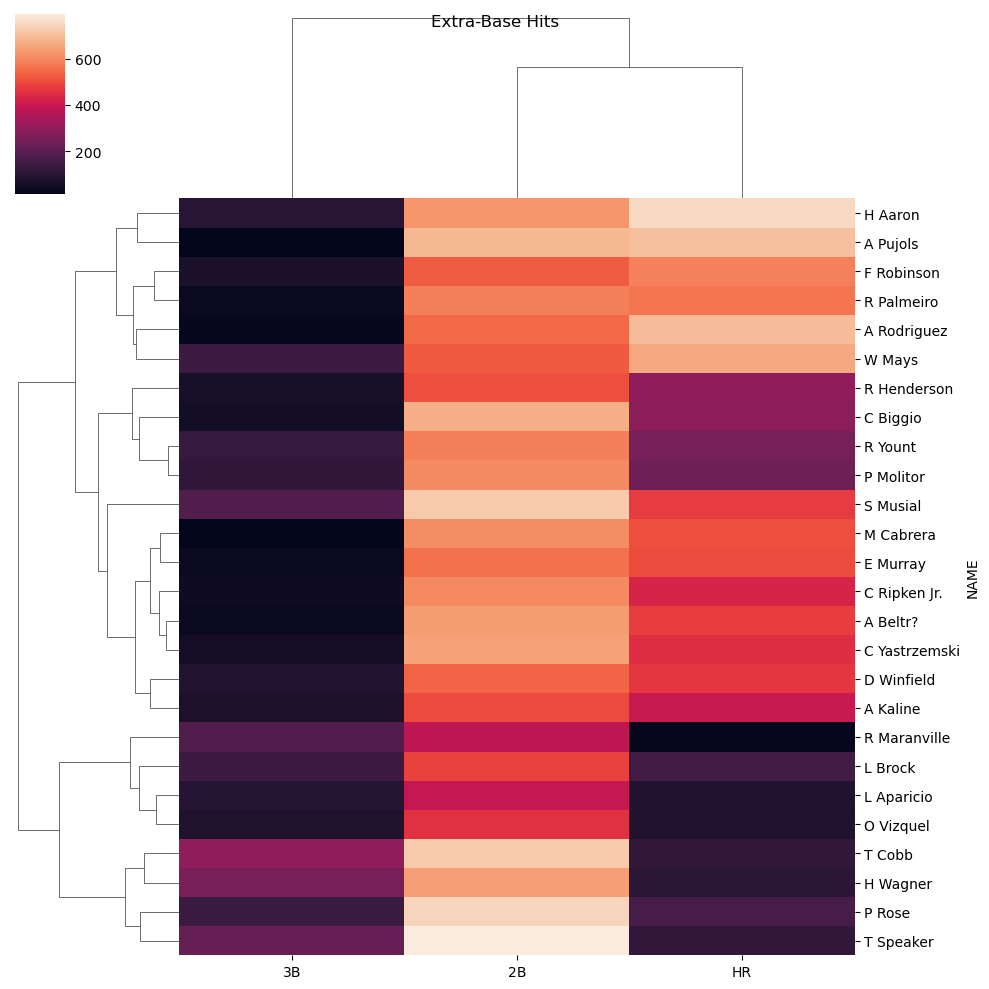

In [155]:
# Clustermap of extra base hits

sns.clustermap(df_hitting_long_careers.loc[:, ["2B", "3B", "HR"]]).fig.suptitle("Extra-Base Hits")

From these first two clustermaps, we can see that hitters from similar eras tend to be closely related, as expected. For example, hitters from the early 1900s, such as Honus Wagner and Ty Cobb, have very low strikeout totals, while more modern players, such as Alex Rodriguez and Miguel Cabrera, tend to have high amounts of both strikeouts and walks.   

The next subset will consist of power hitters (hitters with more than 400 home runs over their career).

In [156]:
# select only hitters with most home runs

hr_filter = df_hitting["HR"] > 400

df_hitting_power_hitters = df_hitting.where(hr_filter)

In [157]:
df_hitting_power_hitters = df_hitting_power_hitters.dropna()

In [158]:
df_hitting_power_hitters_numeric = df_hitting_power_hitters.iloc[:, 2:]

In [159]:
df_hitting_power_hitters_numeric = df_hitting_power_hitters_numeric.dropna()

Text(0.5, 0.98, 'Production at Plate')

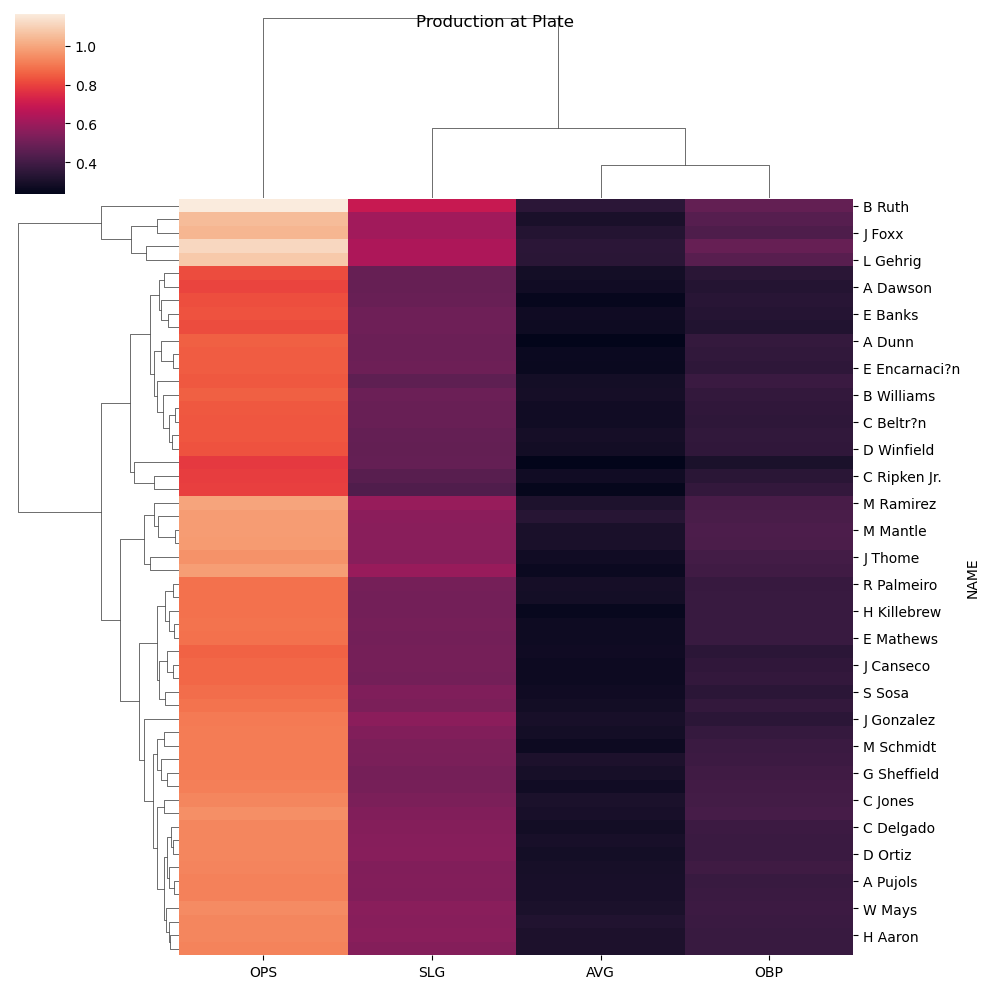

In [161]:
# Clustermap of common hitting metrics

sns.clustermap(df_hitting_power_hitters.loc[:, ["AVG", "OBP", "SLG", "OPS"]]).fig.suptitle("Production at Plate")

This clustermap helps to highlight the truly elite power hitters in the game's history, who have extremely high SLG (slugging) and OPS (on-base percentage plus slugging) values, such as Manny Ramirez, Babe Ruth, Lou Gehrig, and Mickey Mantle. The dendrogram shows that Babe Ruth isn't closely related to the rest of the hitters in this group, further illustrating his extreme production throughout his career. 

This chart also shows that pure hitting measures, such as AVG and OBP are much more closely related than power measures, such as OPS.

The final subset we'll look at consists of hitters who primarily relied on other methods of production, such as stolen bases, walks, and singles. These are hitters who might tend to perform even better with the new rules changes.

In [162]:
# select only hitters with walk / single / speed combo

sp_filter = (df_hitting["SB"] > 400) & (df_hitting["BB"] > 1000) & (df_hitting["H"] > 2000)

df_hitting_speed_hitters = df_hitting.where(sp_filter)

In [163]:
df_hitting_speed_hitters = df_hitting_speed_hitters.dropna()

In [164]:
df_hitting_speed_hitters_numeric = df_hitting_speed_hitters.iloc[:, 2:]

In [165]:
df_hitting_speed_hitters_numeric = df_hitting_speed_hitters_numeric.dropna()

Text(0.5, 0.98, 'Hitting Production')

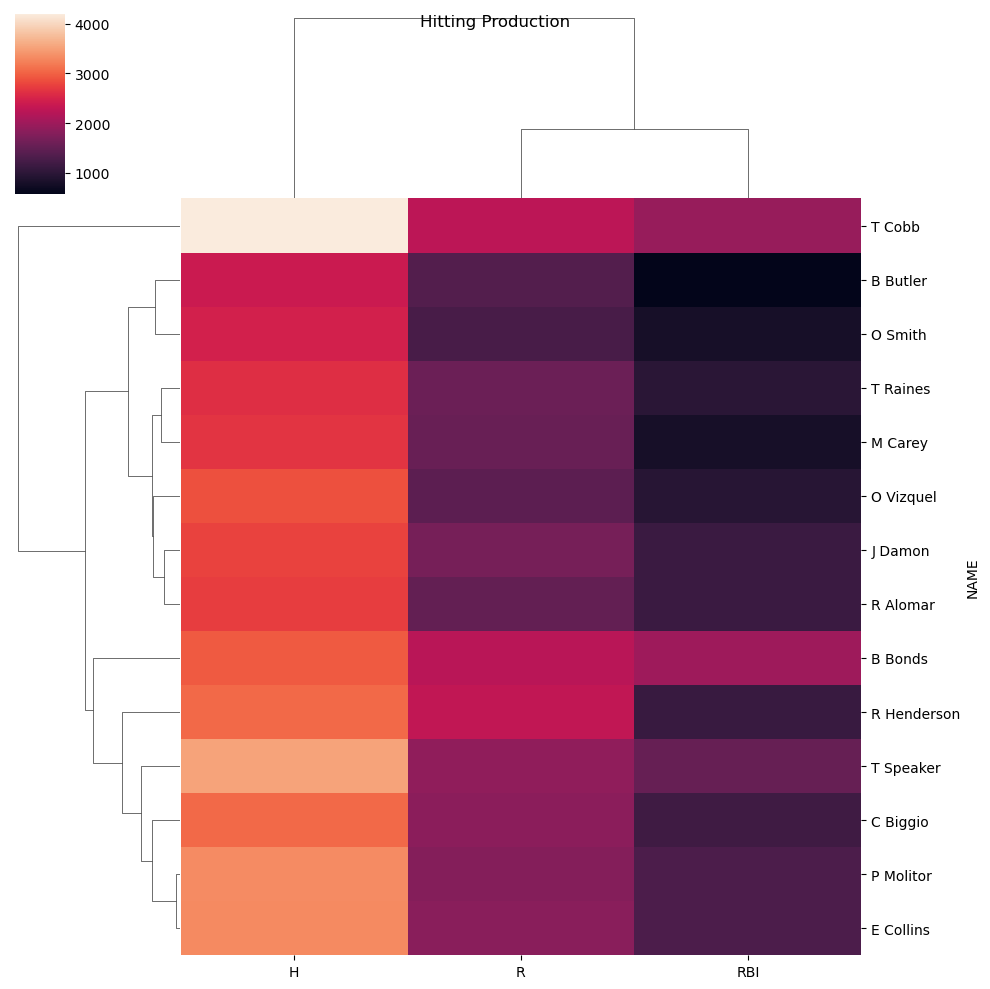

In [166]:
sns.clustermap(df_hitting_speed_hitters.loc[:, ["R", "H", "RBI"]]).fig.suptitle("Hitting Production")

This chart clearly shows that Ty Cobb (a top player from the early 1900s) is not closely related with many of the other hitters in this filter.

Text(0.5, 0.98, 'Stolen Base Production')

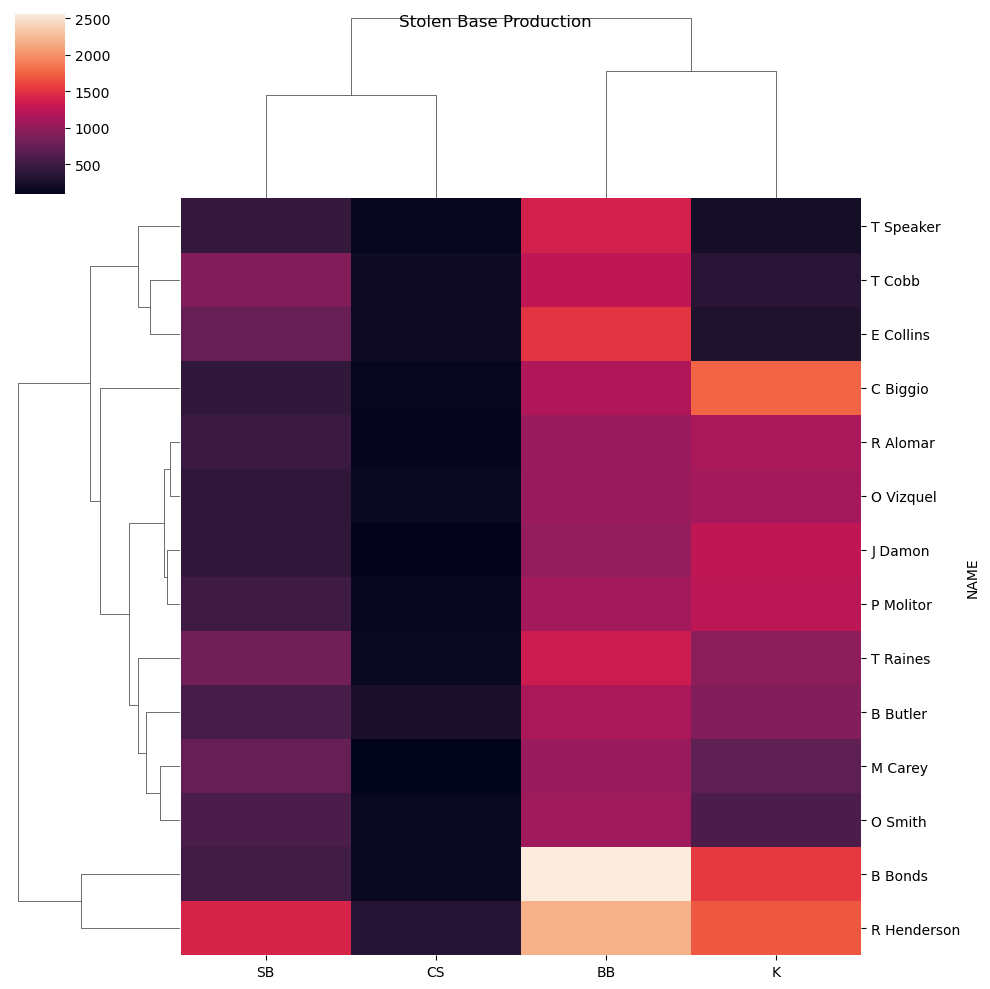

In [167]:
sns.clustermap(df_hitting_speed_hitters.loc[:, ["SB", "CS", "BB", "K"]]).fig.suptitle("Stolen Base Production")

This chart is interesting in that it shows that power hitters who also happened to be good base stealers (such as Barry Bonds) are not as closely related as other hitters who purely specialized in getting on base (such as Craig Biggio).

In [1]:
### PCA Component Analysis

Finally, we are going to explore PCA Component Analysis to help visualize and highlight outliers in the data.

#### Pitching

In [173]:
df_pitching_numeric = df_pitching.iloc[:, 2:]

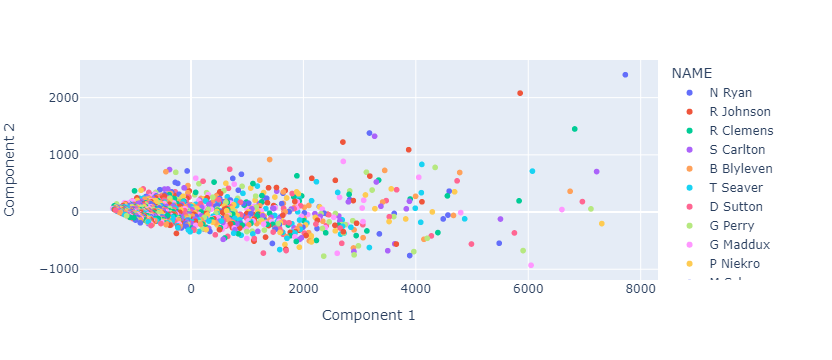

In [177]:
pca = PCA(n_components='mle',svd_solver='full').fit(df_pitching_numeric)
X=pd.DataFrame(PCA(n_components=len(df_pitching_numeric.columns)).fit_transform(df_pitching_numeric),index=df_pitching_numeric.index)
X.columns+=1
X=X.rename(columns= 'Component {}'.format)

fig = px.scatter(X, x=X.loc[:,'Component 1'],y=X.loc[:,'Component 2'],color=X.index)
fig.show()


In [180]:
print("These two components account for {:.2f}% of the variance in the pitching data".format(pca.explained_variance_ratio_[:2].sum()*100))

These two components account for 98.78% of the variance in the pitching data


#### Hitting

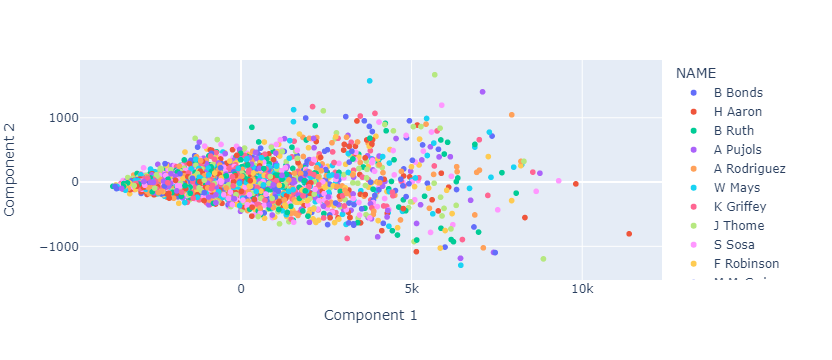

In [181]:
pca = PCA(n_components='mle',svd_solver='full').fit(df_hitting_numeric)
X=pd.DataFrame(PCA(n_components=len(df_hitting_numeric.columns)).fit_transform(df_hitting_numeric),index=df_hitting_numeric.index)
X.columns+=1
X=X.rename(columns= 'Component {}'.format)

fig = px.scatter(X, x=X.loc[:,'Component 1'],y=X.loc[:,'Component 2'],color=X.index)
fig.show()

In [182]:
print("These two components account for {:.2f}% of the variance in the pitching data".format(pca.explained_variance_ratio_[:2].sum()*100))

These two components account for 98.85% of the variance in the pitching data


In PCA, component 1 represents the direction of maximum variance, while component 2 represents the direction of maximum variance relative to component 1.

These analysis help to condense our relatively high dimensional datasets into 2D graphs that can be fairly easily interpreted. As expected, these graphs show that the all-time great players are statistical outliers from the rest of the dataset. 

For example, the blue dot in the top right of the pitching graph represents Nolan Ryan, widely regarded as the top pitcher of all time. Similarly, the red dot in the bottom right of the hitting graph represents Pete Rose, a top power hitter. 

Since Ryan had large positive values for both components, while Rose had a large positive value for component 1 and a large negative value for component 2, this may help to show that Ryan was a more well-rounded player (in comparison to his peers at his position). 

**Performance Results**

Our dataset definitely worked better for some methods of clustering than others. For example, the large number of observations made hierarchical clustering methods, such as sklearn's AgglomerateClustering() method, difficult to use and run efficiently. Similarly, DBScan proved to be difficult to implement, and didn't seem to be the best option for analyzing our data, as we didn't seem to have many clusters of similar density.

Thankfully, other methods proved to be quite effective and efficient with our dataset, especially seaborn's clustermap, which created dendrogram visualizations much easier than using hierarchical methods, and PCA analysis. Therefore, traditional clustering methods seem to be the best way to analyze our dataset of all numeric variables.

**Discussion**

These datasets were not overly difficult to clean and organize. The only downside to them was that they did not include years played for each player, making analysis of trends across time difficult. We had to rely on our domain knowledge to extract these insights.

Based on our analysis, there does seem to be a clear distinction between the all-time great players and the rest of the dataset, which was very neat to see confirmed across the different methods. 

**Conclusion**

In conclusion, using common clustering techniques on a well-formatted set of baseball statistics has the potential to demonstrate common trends across time for numerous measures, both for hitters and pitchers. This analysis could then be extended to a more classification - based approach in order to predict the performance of future hitters. Traditional, distance - based approaches to clustering work best for this dataset, which consists of entirely numeric variables (besides player position), and shows how baseball has both changed in its style and exhibited cycles of trends throughout its existence.